# Evaluation of the deblurring results
This notebook presents the results both by showing the results visually and once by presenting quantitative analysis using metrics, such as PSNR and SSIM.

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import cv2

## Different Gaussian Kernel Sizes

The original model the author of the project used was trained on images which were blurred using a Gaussian Kernel of size 51x51. With our chosen dataset we also trained the model on images with Gaussian Kernel of size 51x51 but this lead to poor results. We wanted to see the origin of the issue, so we compared the blur effect of the Gaussian Kernel of size 51x51 on the original dataset and our chosen dataset. In the plots below we can see that the blur effect (51x51) is much stronger on the chosen dataset then on the original dataset. The reason for this can be the differences in resolution of the images in the two datasets. After realizing this, we trained the model on images with Gaussian Kernel of size 15x15 and the results were much better - also visibly closer to the results of the original model with the original dataset.

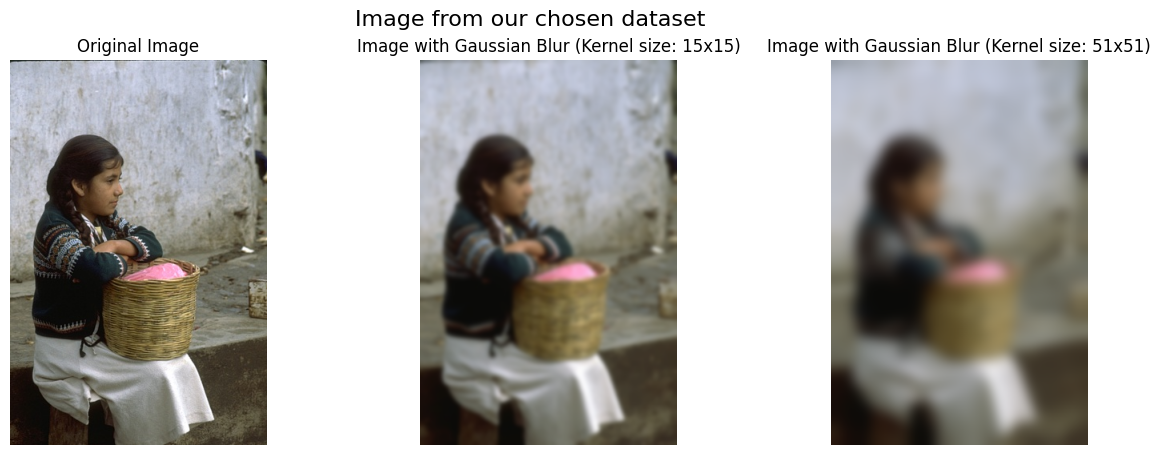

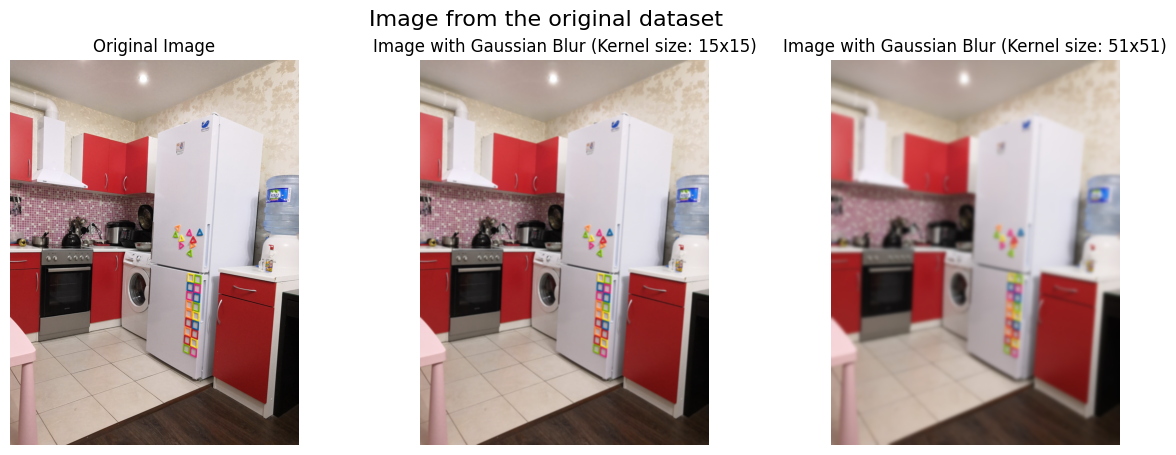

In [2]:
# From our chosen dataset
img = cv2.imread('chosen_img_example.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur_51 = cv2.GaussianBlur(img, (51, 51), 0)
blur_15 = cv2.GaussianBlur(img, (15, 15), 0)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blur_15)
plt.title('Image with Gaussian Blur (Kernel size: 15x15)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blur_51)
plt.title('Image with Gaussian Blur (Kernel size: 51x51)')
plt.axis('off')

plt.suptitle('Image from our chosen dataset', fontsize=16)
plt.show()

# From the original dataset
img = cv2.imread('original_img_example.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur_51 = cv2.GaussianBlur(img, (51, 51), 0)
blur_15 = cv2.GaussianBlur(img, (15, 15), 0)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blur_15)
plt.title('Image with Gaussian Blur (Kernel size: 15x15)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blur_51)
plt.title('Image with Gaussian Blur (Kernel size: 51x51)')
plt.axis('off')

plt.suptitle('Image from the original dataset', fontsize=16)
plt.show()

## Chosen Metrics

To make the results measureable, the PSNR and SSIM metric were implemented.

The PSNR metric heavily relies on the MSE between the compared images. If the MSE value becomes close to zero, then the PSNR goes to infinite. To counter this issue, in the implemented function for perfect matching (meaning, that MSE is zero), the resulting PSNR value is 100.

In contrast to PSNR, the SSIM metric tries to catch the similarity of 2 images and the metric is in the range of 0 and 1. Unlike MSE or PSNR, which estimate absolute errors, SSIM focuses on the inter-dependencies of pixels, especially when they are spatially close. 

# Original Dataset

As a first step, we took the original dataset and applied the Gaussian Kernel of size 51x51 to the images. We then trained the CNN model one the original and blurred image pairs. (The model structure can be found in under **/src/models.py** and the code for training in **/src/training_colab.ipynb** or **/src/training.py**. The trained model is saved under **/outputs**.) 

In the **test_models.ipynb** notebook we generated the deblurred images on the test subset of the images. The deblurred images can be found under **/data/test_data/deblurred**. The results of the deblurring are shown below. 5 randomly picked images from the test dataset are representing the quality of the deblurring capability of the CNN model.

#### Visual Comparison

In [3]:
file_path = "data/test_data/sharp/original_dataset/test_set_orig_dataset.txt"

with open(file_path, 'r') as file:
    test_images = [line.strip() for line in file]

np.random.seed(123)
random_indices = np.random.choice(len(test_images), 5, replace=False)
random_pick = [test_images[i] for i in random_indices]

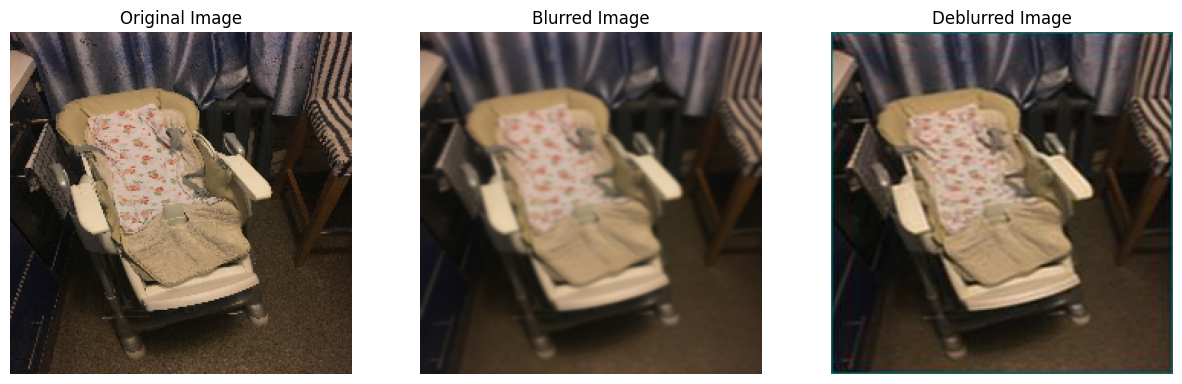

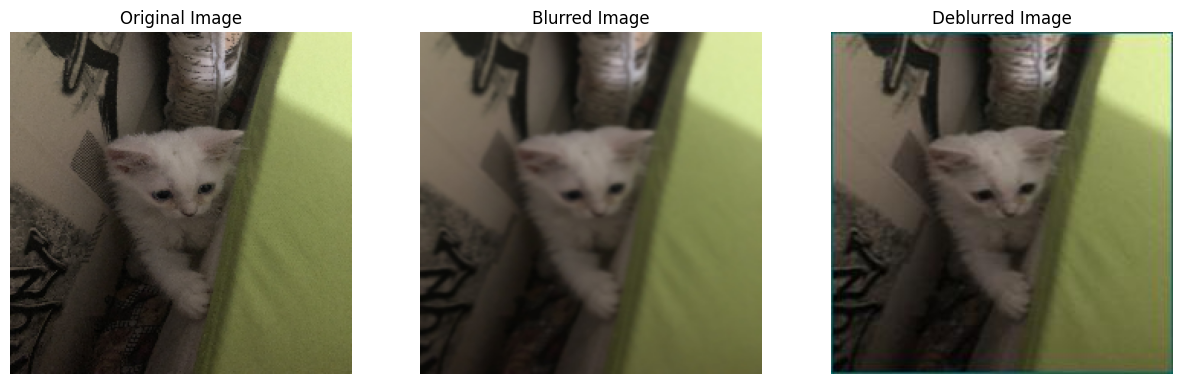

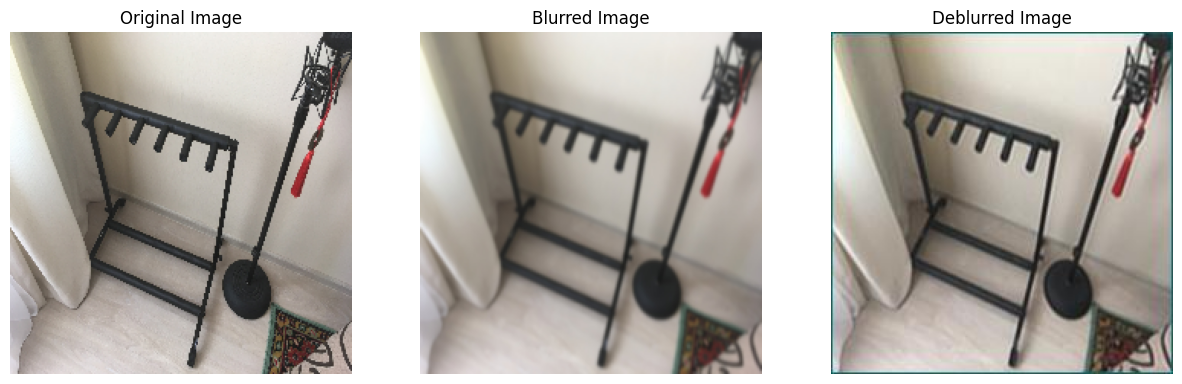

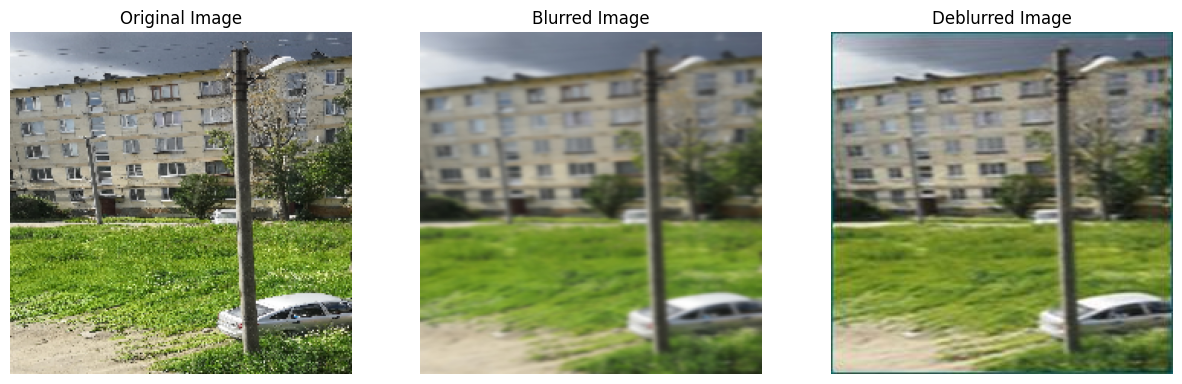

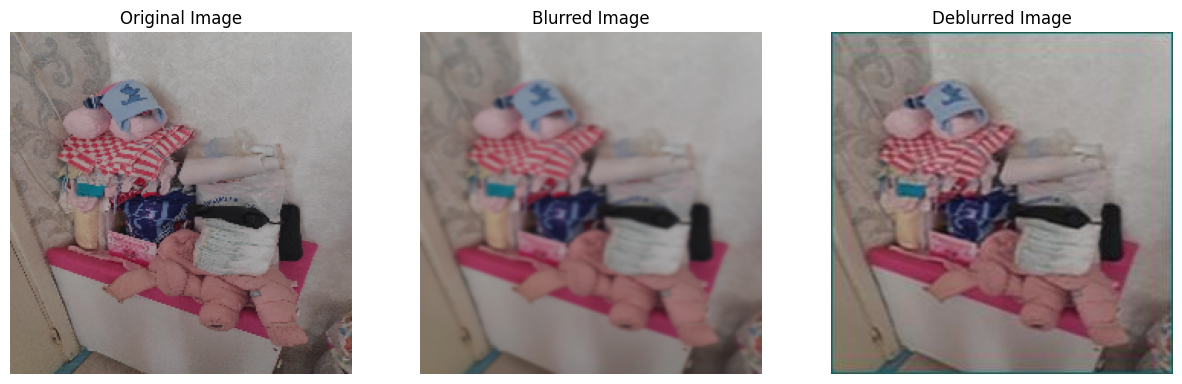

In [4]:
for image in random_pick:
    # Read images
    orig_image = plt.imread(f"data/train_data/sharp/original_dataset/{image}")
    blur_image = plt.imread(f"data/train_data/gaussian_blurred/original_dataset/{image}")
    deblur_image = plt.imread(f"data/test_data/deblurred/original_dataset/deblurred_{image}")
        
    # Resize images to (224, 224)
    orig_image = cv2.resize(orig_image, (224, 224))
    blur_image = cv2.resize(blur_image, (224, 224))
    deblur_image = cv2.resize(deblur_image, (224, 224))

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(orig_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(blur_image)
    plt.title('Blurred Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(deblur_image)
    plt.title('Deblurred Image')
    plt.axis('off')

    plt.show()

#### PSNR and SSIM

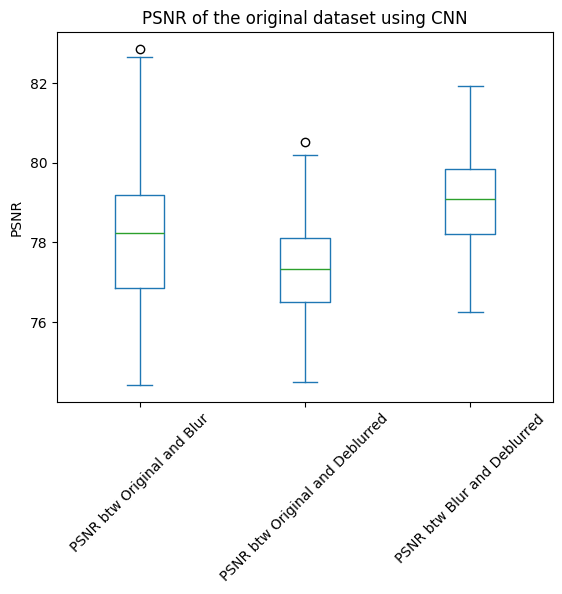

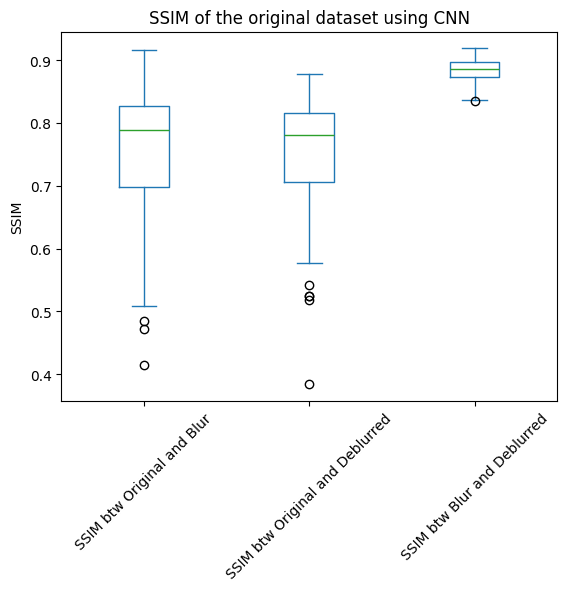

In [5]:
# Load PSNR and SSIM resutts
orig_psnr = pd.read_csv("results/psnr_original_dataset.csv", index_col=0)
orig_ssim = pd.read_csv("results/ssim_original_dataset.csv", index_col=0)

ax = orig_psnr.plot(kind="box")
ax.set_xticklabels(rotation=45, labels=orig_psnr.columns)
plt.title("PSNR of the original dataset using CNN")
plt.ylabel("PSNR")
plt.show()

ax = orig_ssim.plot(kind="box")
ax.set_xticklabels(rotation=45, labels=orig_ssim.columns)
plt.title("SSIM of the original dataset using CNN")
plt.ylabel("SSIM")
plt.show()

# Berkley dataset (our chosen dataset)

The data is the benchmark dataset called the Berkley Segmentation Dataset and Benchmark including 300 images (BSDS300) (https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/). The models were trained on 200 images of the train dataset and the evaluation was done on the remaining 100 images. To blur the images a Gaussian blur was implemented with the kernel size of 51 and 15, respectively. In the following, the test results of the following are shown:
- CNN model trained on images with Gaussian Kernel of size 51x51
- CNN model trained on images with Gaussian Kernel of size 15x15
- Autoencoder model (SimpleAE) trained on images with Gaussian Kernel of size 15x15

### CNN model - Gaussian Blur 51x51

#### Visual Comparison

#### PSNR and SSIM

### CNN model - Gaussian Blur 15x15

#### Visual Comparison

#### PSNR and SSIM

### SimpleAE model - Gaussian Blur 15x15

In [6]:
src_dir = 'data/test_data/sharp/chosen_dataset'
test_images = os.listdir(src_dir)
np.random.seed(123)
random_pick = np.random.choice(test_images, 5, replace=False)

In the following section, the original, the blurred and the deblurred images of 5 randomly picked images are shown from the test dataset. This helps to better interpret the quantitative results of the PSNR and SSIM metrics.

#### Visual Comparison

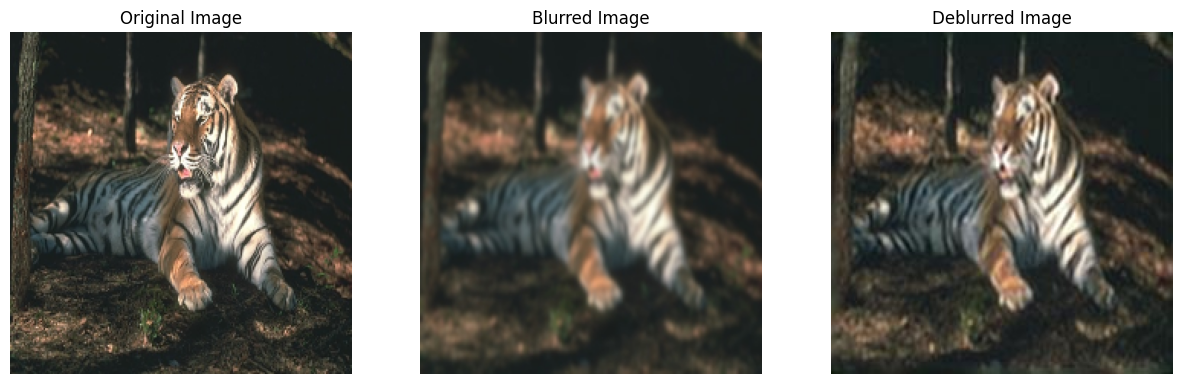

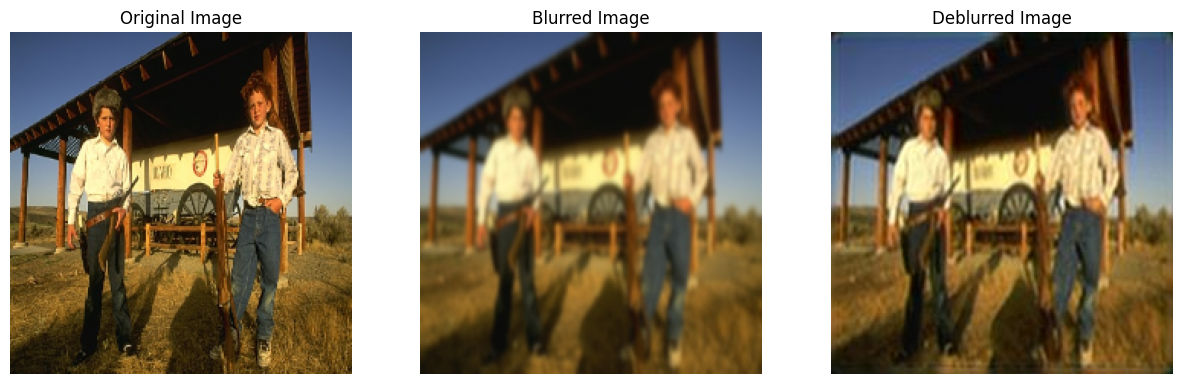

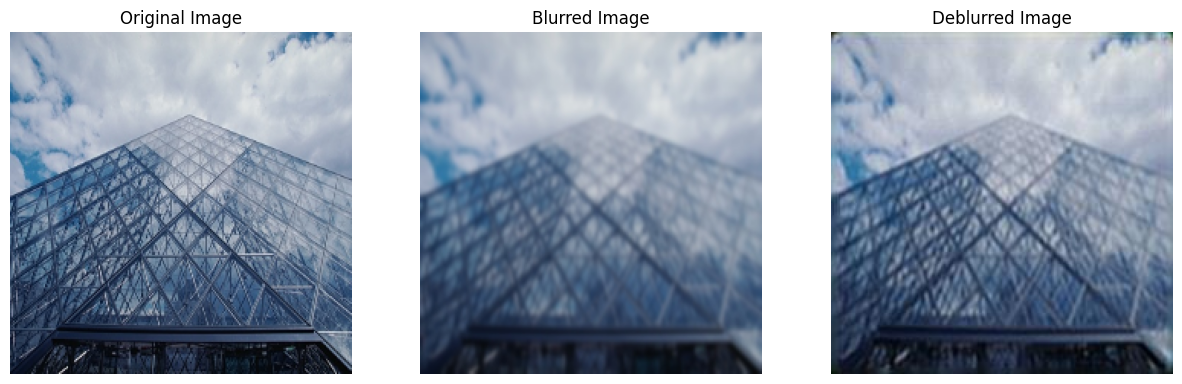

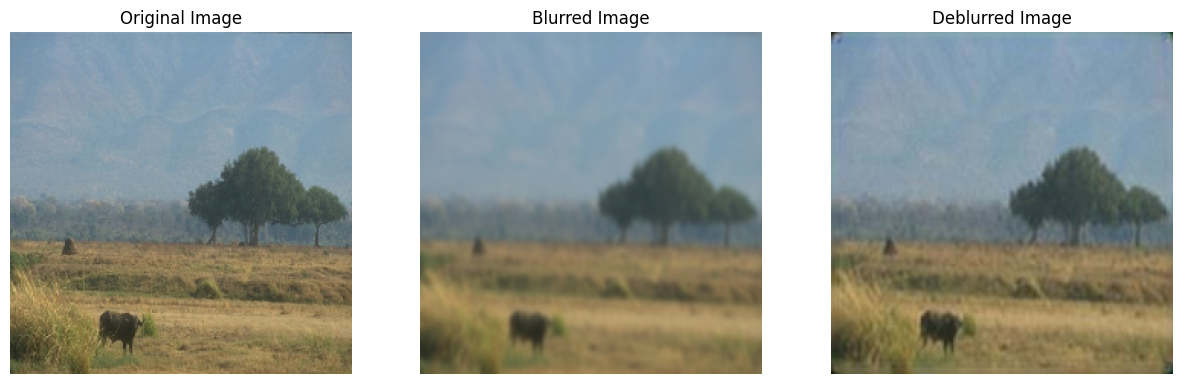

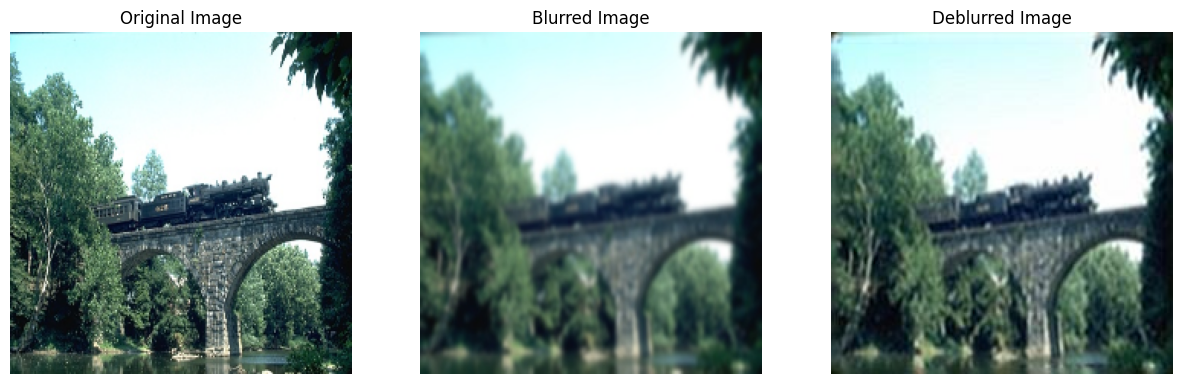

In [11]:
for image in random_pick:
    # Read images
    orig_image = plt.imread(f"data/test_data/sharp/chosen_dataset/{image}")
    blur_image = plt.imread(f"data/test_data/gaussian_blurred/chosen_dataset_15x15/{image}")
    deblur_image = plt.imread(f"data/test_data/deblurred/chosen_dataset_simpleae/deblurred_{image}")
        
    # Resize images to (224, 224)
    orig_image = cv2.resize(orig_image, (224, 224))
    blur_image = cv2.resize(blur_image, (224, 224))
    deblur_image = cv2.resize(deblur_image, (224, 224))

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(orig_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(blur_image)
    plt.title('Blurred Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(deblur_image)
    plt.title('Deblurred Image')
    plt.axis('off')

    plt.show()

#### PSNR and SSIM

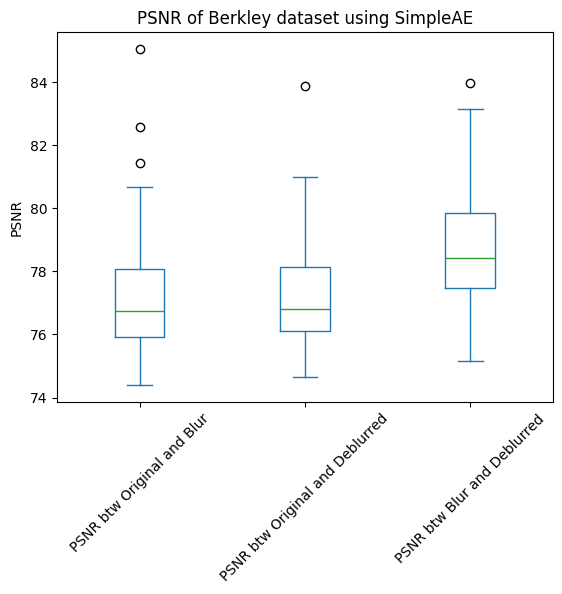

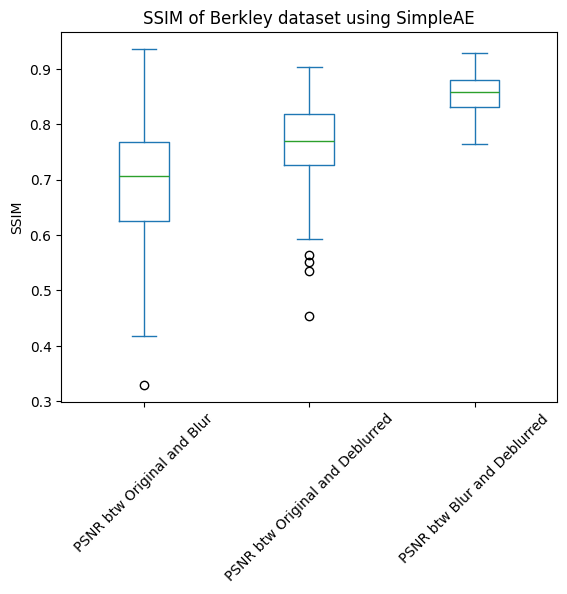

In [24]:
# Load PSNR and SSIM resutts
berkley_psnr = pd.read_csv("test_data/psnr_berkley_simpleae.csv", index_col=0)
berkley_ssim = pd.read_csv("test_data/ssim_berkley_simpleae.csv", index_col=0)

ax = berkley_psnr.plot(kind="box")
ax.set_xticklabels(rotation=45, labels=berkley_psnr.columns)
plt.title("PSNR of Berkley dataset using SimpleAE")
plt.ylabel("PSNR")
plt.show()

ax = berkley_ssim.plot(kind="box")
ax.set_xticklabels(rotation=45, labels=berkley_psnr.columns)
plt.title("SSIM of Berkley dataset using SimpleAE")
plt.ylabel("SSIM")
plt.show()

# Compare results of all models

#### Visual Comparison

#### PSNR and SSIM